#This is the Python code examples for traditional machine learning models 
The following examples are merely to provide you some sense of machine learning models.
The theories of all following models will be taught in **INFR11205** or **CMSE11459**. But you can self-study and play around the following examples for fun at the first week before diving into their theories.

Enjoy!

# Using synthetic data in traditional ML models

## Logistic Regression Examples

### Import some library

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from pylab import plt, mpl

###Random generate some data

In [2]:
# number of samples
n_samples = 10000

# set random seed
np.random.seed(0)

x = np.random.normal(size=n_samples)
y = (x>0).astype(float)

x[x > 0] *= 4
x += 0.3 * np.random.normal(size=n_samples)
x = x[:, np.newaxis]

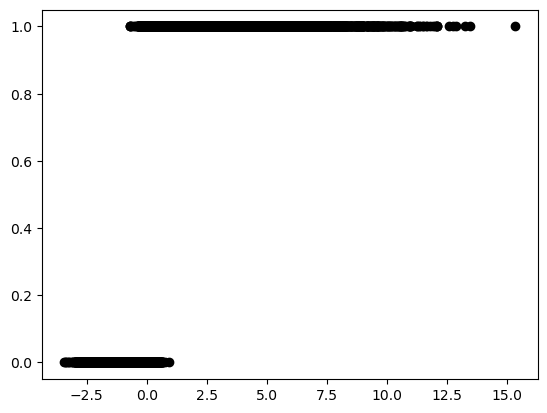

In [3]:
# plot the data
plt.scatter(x, y, color='black')


In [4]:
# import the LR model
from sklearn.linear_model import LogisticRegression

# define the LR model
skl_model = LogisticRegression()

# train the model
%time skl_model.fit(x, y)

CPU times: user 10.3 ms, sys: 1.4 ms, total: 11.7 ms
Wall time: 13.9 ms


LogisticRegression()

In [5]:
# forecast using the model
x_test = np.linspace(-5, 10, 300)
x_test = x_test[:, np.newaxis]
prob = skl_model.predict(x_test).ravel()

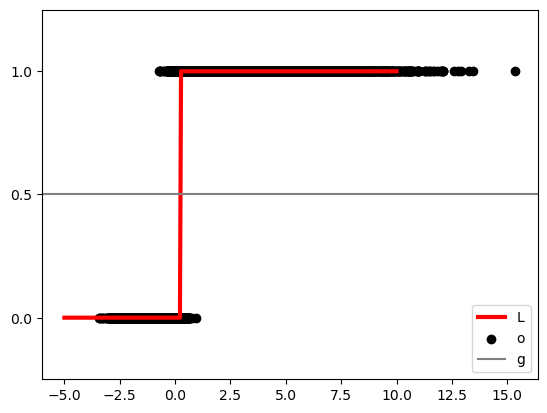

In [6]:
# plot the forecasted result
plt.plot(x_test, prob, color='red', linewidth=3)
plt.scatter(x, y, color='black');
plt.axhline(0.5, color='0.5');
plt.ylim(-0.25, 1.25);
plt.yticks([0, 0.5, 1]);
plt.legend(('Logistic Regression Model'), loc='lower right')


##Support Vector Machine



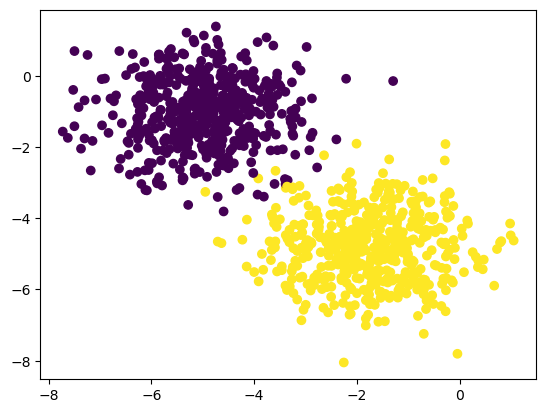

In [7]:
# import some dataset for testing SVM
from sklearn import datasets

# number of samples
n_samples = 1000

# generate the data
X, y = datasets.make_blobs(n_samples=n_samples, centers=2, random_state=33)

# change the label y to be -1 and 1 for two classes
y[y == 0] = -1
y[y == 1] = 1

# observe two classes
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
# import SVM
from sklearn import svm

# define SVM with linear kernel
skl_model = svm.SVC(kernel='linear', C=1000)

# percentage data for training the model
trn_r = 0.7
trn_idx = int(0.7*n_samples)

# train the model with the data
%time skl_model.fit(X[0:trn_idx,], y[0:trn_idx])



CPU times: user 16.1 ms, sys: 2.06 ms, total: 18.2 ms
Wall time: 22 ms


SVC(C=1000, kernel='linear')

Text(0.5, 1.0, 'predicted training data')

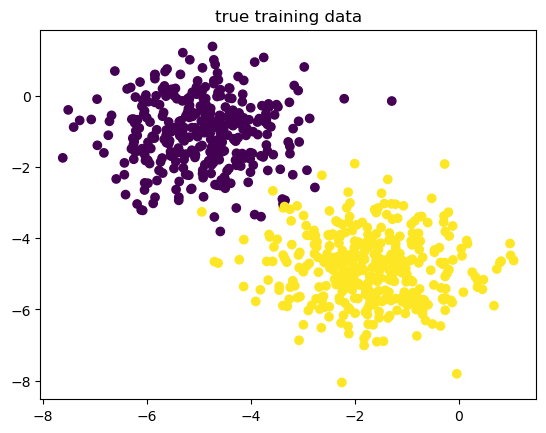

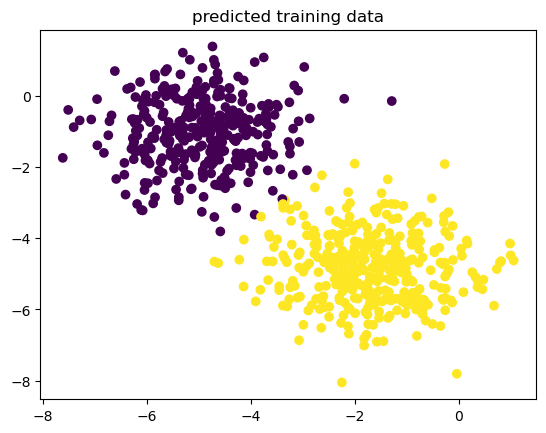

In [9]:
# testing with training data 

trn_rslt = skl_model.predict( X[0:trn_idx,] )

# observe the predicted and true data
fig1 = plt.figure()
plt.scatter(X[0:trn_idx,0], X[0:trn_idx,1], c=y[0:trn_idx])
plt.title('true training data')

fig2 = plt.figure()
plt.scatter(X[0:trn_idx,0], X[0:trn_idx,1], c=trn_rslt)
plt.title('predicted training data')

Text(0.5, 1.0, 'predicted testing data')

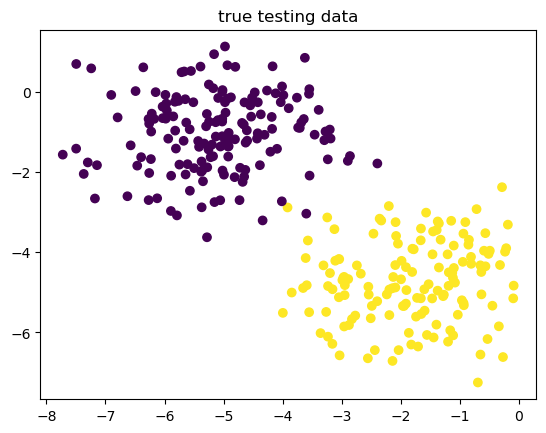

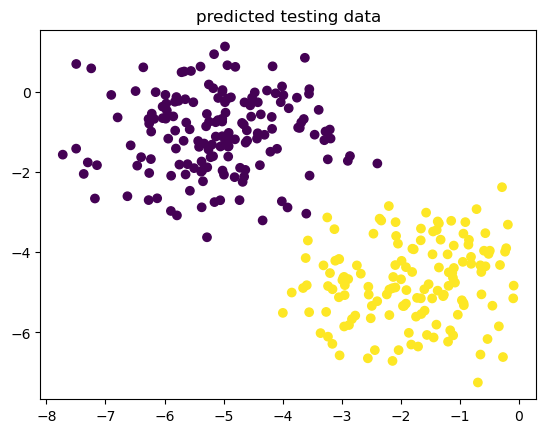

In [10]:
# testing with remained data

tst_rslt = skl_model.predict( X[trn_idx:,] )

# observe the predicted and true data
fig1 = plt.figure()
plt.scatter(X[trn_idx:,0], X[trn_idx:,1], c=y[trn_idx:])
plt.title('true testing data')

fig2 = plt.figure()
plt.scatter(X[trn_idx:,0], X[trn_idx:,1], c=tst_rslt)
plt.title('predicted testing data')

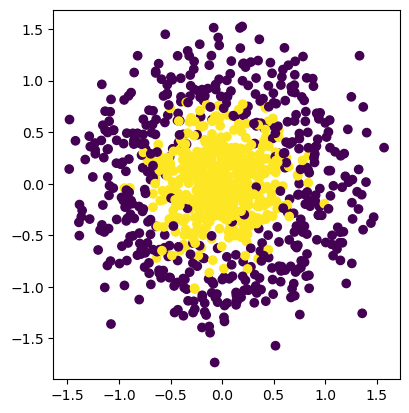

In [11]:
# generate a circle data to show kernel function
# the dataset is complex that the linear kernel function doesn't work, only the RBF kernel fits well

from sklearn import svm
from sklearn.model_selection import cross_val_score

# create a new complex circle dataset
X, y = datasets.make_circles(n_samples=1000, factor=0.3, noise=0.25, random_state=2019)

# visulize the data with two classes
plt.subplot(111, aspect='equal')
plt.scatter(X[:,0], X[:,1], c=y)


In [12]:
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T


10-fold cv scores with linear kernel:  0.614


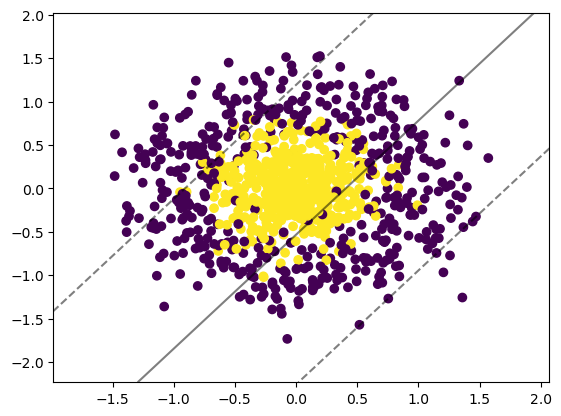

In [13]:
# linear kernel
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
Z = clf.decision_function(xy).reshape(XX.shape)

# draw decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);
print('10-fold cv scores with linear kernel: ', np.mean(cross_val_score(clf, X, y, cv=10)))


10-fold cv scores with Polynomial kernel:  0.529


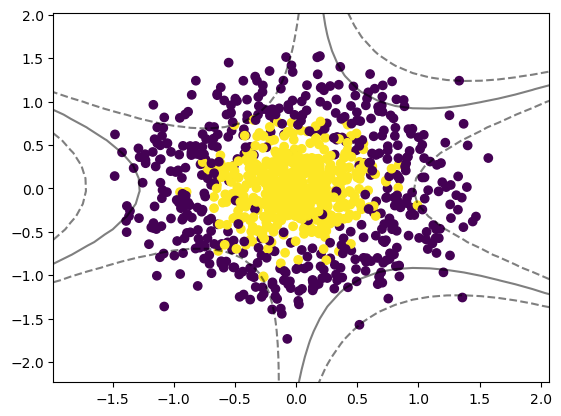

In [14]:
# polynomial kernel
clf = svm.SVC(kernel='poly', gamma='auto')
clf.fit(X,y)
Z = clf.decision_function(xy).reshape(XX.shape)

# draw decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:,0], X[:,1], c=y);
print('10-fold cv scores with Polynomial kernel: ', np.mean(cross_val_score(clf, X, y, cv=10)))


10-fold cv scores with RBF kernel:  0.8960000000000001


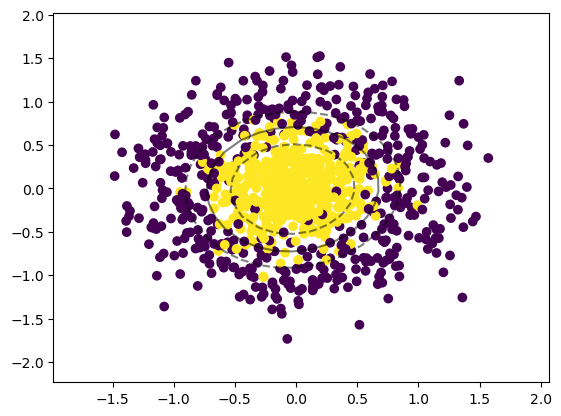

In [15]:
# Gaussian kernel
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X,y)
Z = clf.decision_function(xy).reshape(XX.shape)


# draw decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(X[:,0], X[:,1], c=y);
print('10-fold cv scores with RBF kernel: ', np.mean(cross_val_score(clf, X, y, cv=10)))


##k-Nearest Neighbors

In [16]:
# import the knn library
from sklearn import neighbors

# define the knn model
skl_model = neighbors.KNeighborsClassifier()

# train the model
skl_model.fit(X,y)

# test using the training data
tst = skl_model.predict(X)

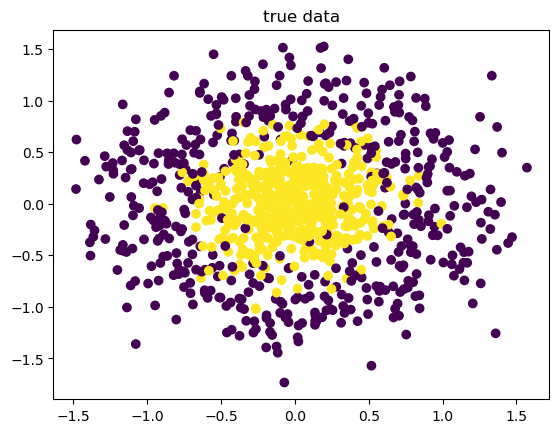

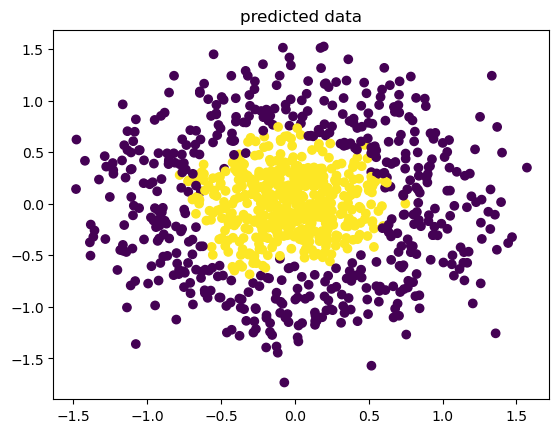

In [17]:

# visulize the data with two classes
fig1 = plt.figure()
plt.title('true data')
plt.scatter(X[:,0], X[:,1], c=y)

fig2 = plt.figure()
plt.title('predicted data')
plt.scatter(X[:,0], X[:,1], c=tst)

##Decision Tree

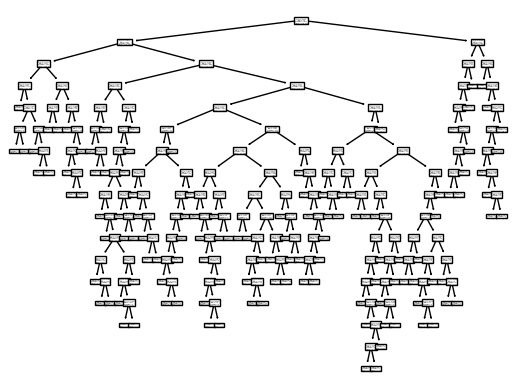

In [18]:
# import tree
from sklearn import tree

# define the model
max_depth = 20
skl_model = tree.DecisionTreeClassifier( max_depth= max_depth )

# traing the model
skl_model.fit(X,y)

tree.plot_tree(skl_model)
plt.show()

# testing
tst = skl_model.predict(X)


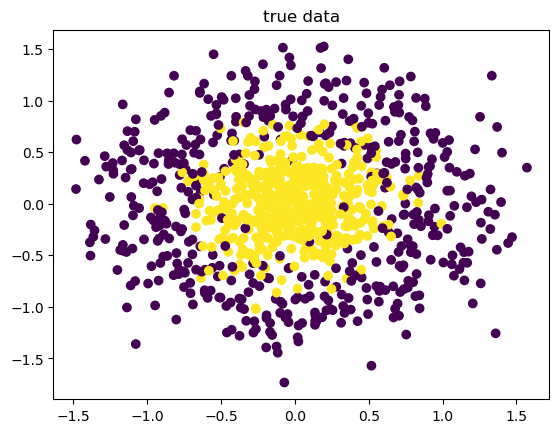

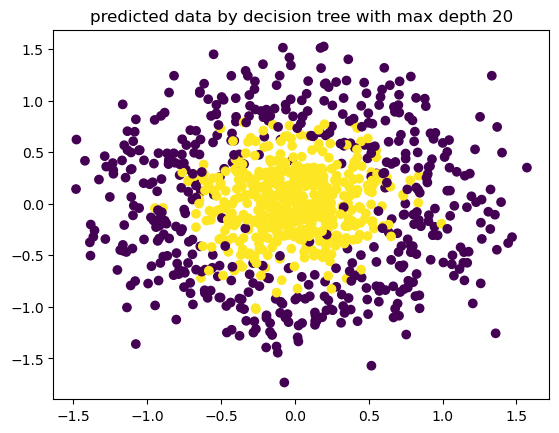

In [19]:

# visulize the data with two classes
fig1 = plt.figure()
plt.title('true data')
plt.scatter(X[:,0], X[:,1], c=y)

fig2 = plt.figure()
plt.title('predicted data by decision tree with max depth '+ str(max_depth))
plt.scatter(X[:,0], X[:,1], c=tst)

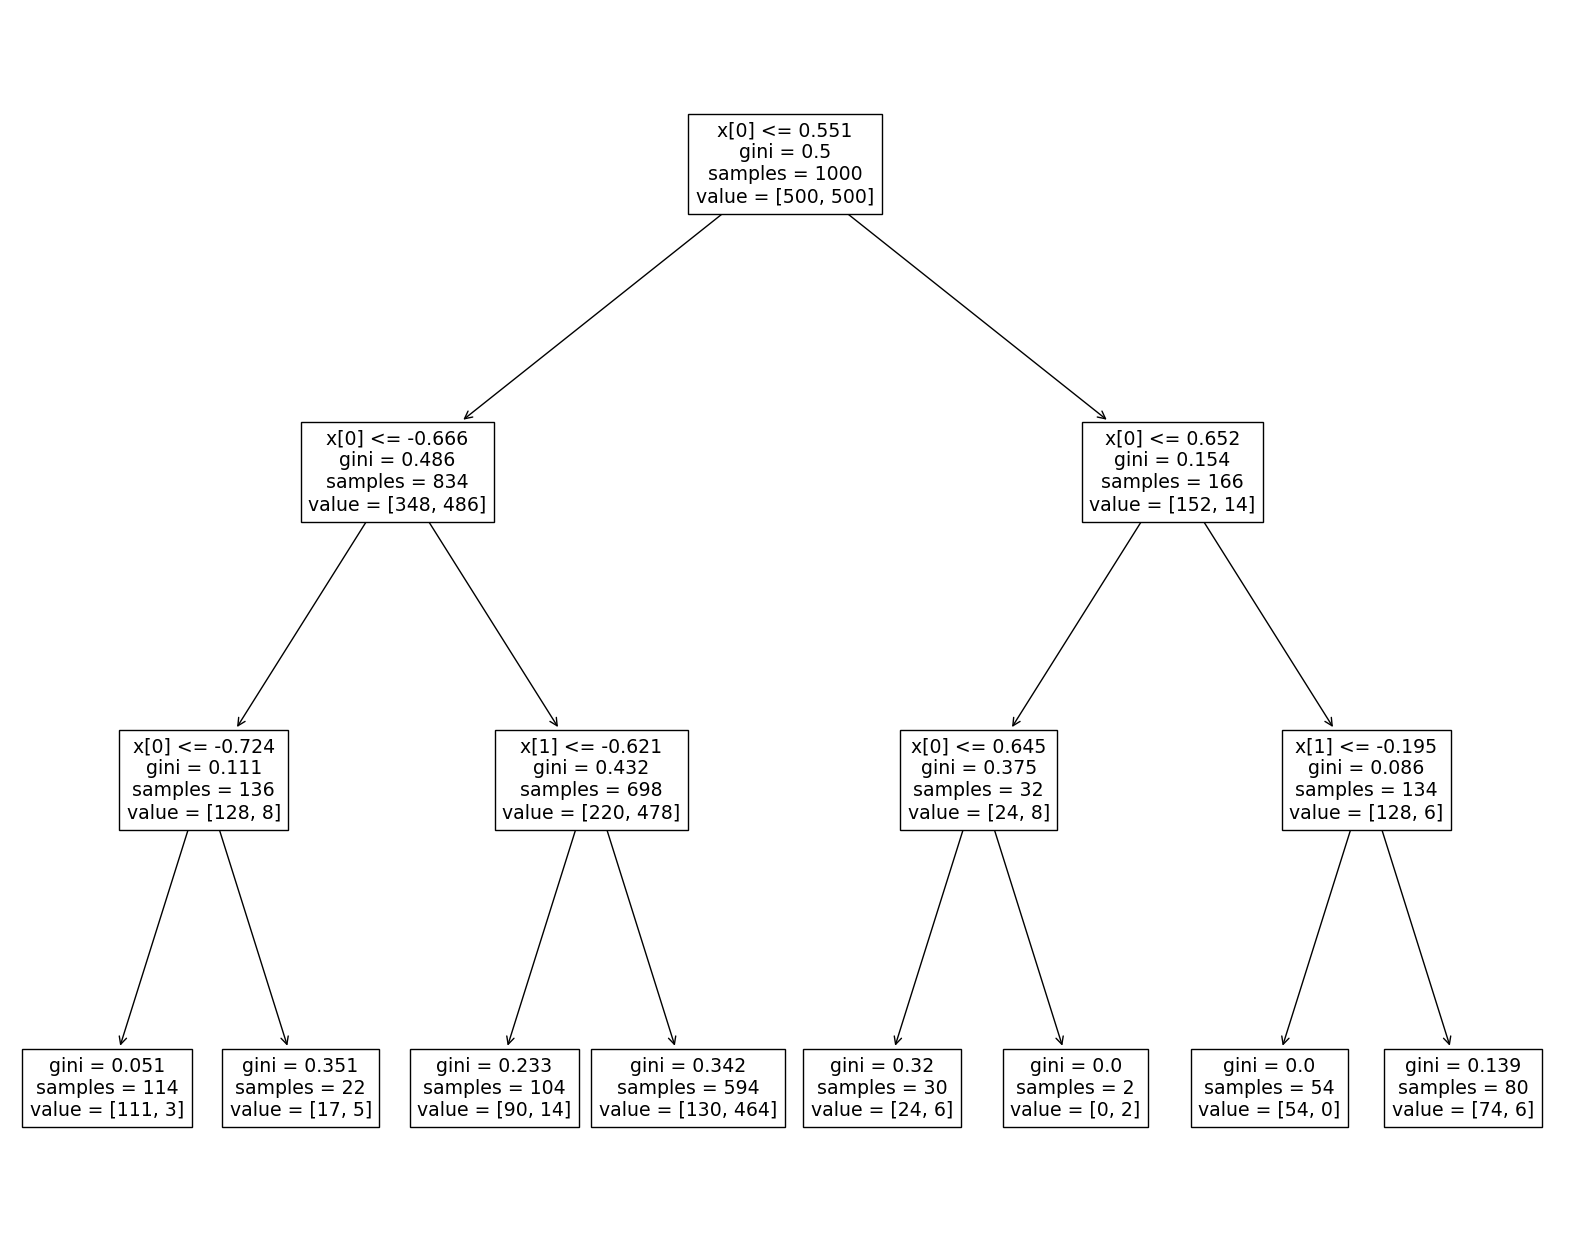

In [20]:
# import tree
from sklearn import tree

# define the model
max_depth = 3
skl_model = tree.DecisionTreeClassifier( max_depth= max_depth )

# traing the model
skl_model.fit(X,y)

plt.figure(figsize=(20, 16))
tree.plot_tree(skl_model)
plt.show()

# testing
tst = skl_model.predict(X)


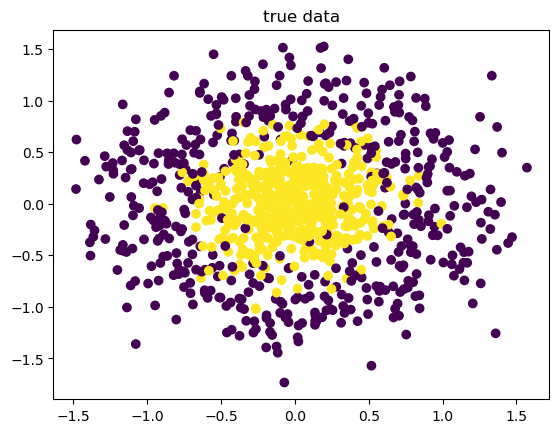

<Figure size 1000x600 with 0 Axes>

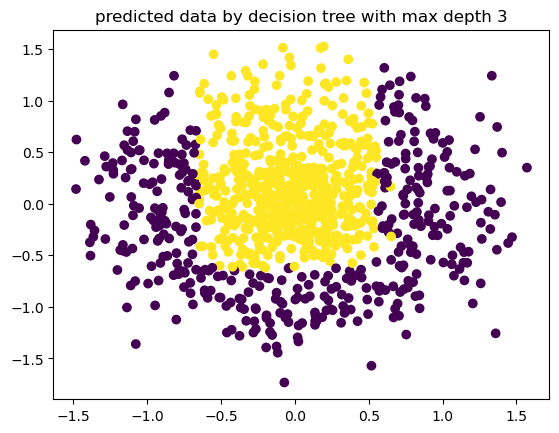

In [21]:

# visulize the data with two classes
fig1 = plt.figure()
plt.title('true data')
plt.scatter(X[:,0], X[:,1], c=y)

plt.figure(figsize=(10, 6))
fig2 = plt.figure()
plt.title('predicted data by decision tree with max depth '+ str(max_depth))
plt.scatter(X[:,0], X[:,1], c=tst)

#*Using real-world data in traditional ML models*

---

In [22]:

from google.colab import drive

#### mount the Google drive as a path that you can work on 
drive.mount('/drive')

#### the Google Drive path always starts with '/drive/My Drive/', you can define your own file directory
raw = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/eur_usd.csv', parse_dates=True)


#### transform the date to datetime format
raw['Date'] = pd.to_datetime(raw['Date'])
raw.set_index('Date', inplace=True)
print(raw.head())


ModuleNotFoundError: No module named 'google.colab'

---

In [24]:
raw = pd.read_csv('eur_usd_close.csv', parse_dates=True)

#### transform the date to datetime format
raw['Date'] = pd.to_datetime(raw['Date'])
raw.set_index('Date', inplace=True)
print(raw.head())

                      CLOSE
Date                       
2019-10-01 00:00:00  1.0899
2019-10-01 00:01:00  1.0898
2019-10-01 00:02:00  1.0896
2019-10-01 00:03:00  1.0898
2019-10-01 00:04:00  1.0898


                      CLOSE
Date                       
2019-10-01 01:00:00  1.0896
2019-10-01 02:00:00  1.0890
2019-10-01 03:00:00  1.0886
2019-10-01 04:00:00  1.0888
2019-10-01 05:00:00  1.0889


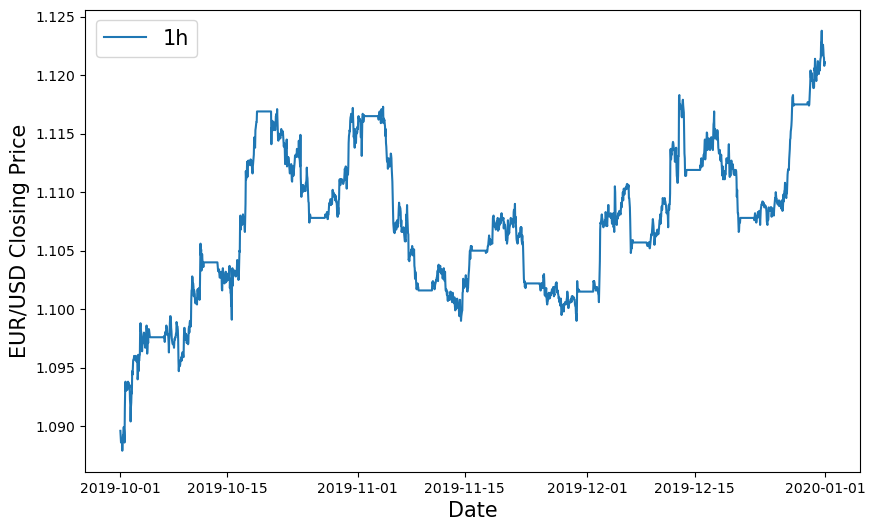

In [25]:
# resample by freq, take the last value of each bin with NaN value filled
# you can try different frequencies: 1min, 10min, 1d, 1w, 1m...
freq = '1h'
data = raw.resample(freq, label='right').last().ffill()
print(data.head())

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(data.index), data['CLOSE'], '-')
plt.xlabel('Date', fontsize=15)
plt.ylabel('EUR/USD Closing Price', fontsize=15)
plt.legend([freq], fontsize=15)

In [29]:
data

,Date
0,2019-10-01 01:00:00
1,2019-10-01 02:00:00
2,2019-10-01 03:00:00
3,2019-10-01 04:00:00
4,2019-10-01 05:00:00
...,...
2203,2019-12-31 20:00:00
2204,2019-12-31 21:00:00
2205,2019-12-31 22:00:00
2206,2019-12-31 23:00:00


In [26]:
# make the date as a normal column
data.reset_index(inplace=True)

# remove other columsn, we only need closing price
data.drop(labels=['HIGH','LOW','OPEN'], axis=1, inplace=True)

# calculate the log return
data['ret'] = np.log( data['CLOSE']/data['CLOSE'].shift(1) )
print(data.head())


KeyError: "['HIGH', 'LOW', 'OPEN'] not found in axis"

In [ ]:
# add rets in previous 2 lags as features to forecast the next ret
data['ret_lag1'] = data['ret'].shift(1)
data['ret_lag2'] = data['ret'].shift(2)
print(data.head(10))



In [27]:
# remove NaN
data.dropna(inplace=True)
data.drop(labels=['CLOSE'], axis=1, inplace=True)

print(data.head(10))

# now we can use ret_lag1 and ret_lag2 as features to forecast ret

                 Date
0 2019-10-01 01:00:00
1 2019-10-01 02:00:00
2 2019-10-01 03:00:00
3 2019-10-01 04:00:00
4 2019-10-01 05:00:00
5 2019-10-01 06:00:00
6 2019-10-01 07:00:00
7 2019-10-01 08:00:00
8 2019-10-01 09:00:00
9 2019-10-01 10:00:00


In [28]:
# make the data as a classification problem

data['ret_y'] = (data['ret']>= data['ret_lag1']).astype(float)
print(data.head(10))

KeyError: 'ret'

In [ ]:
# observe the data

data.loc[data['ret_y'] == 0, 'ret_y'] = -1

# observe two classes
plt.scatter(data.loc[:,'ret_lag1'], data.loc[:,'ret_lag2'], c=data['ret_y'])
plt.xlabel('ret lag1', fontsize=12)
plt.ylabel('ret lag2', fontsize=12)


In [ ]:

# import SVM
from sklearn import svm

# define SVM with linear kernel
skl_model = svm.SVC(kernel='rbf', C=1000)

# percentage data for training the model
trn_r = 0.7
trn_idx = int(0.7* data.shape[0])

# train the model with the data
%time skl_model.fit(data.loc[0:trn_idx,['ret_lag1','ret_lag2']], data.loc[0:trn_idx,'ret_y'])


In [ ]:
# testing with training data 

trn_rslt = skl_model.predict( data.loc[0:trn_idx,['ret_lag1','ret_lag2']] )

# observe the predicted and true data
fig1 = plt.figure()
plt.scatter(data.loc[0:trn_idx,['ret_lag1']], data.loc[0:trn_idx,['ret_lag2']], c=data.loc[0:trn_idx,'ret_y'])
plt.title('true training data')

fig2 = plt.figure()
plt.scatter(data.loc[0:trn_idx,['ret_lag1']], data.loc[0:trn_idx,['ret_lag2']], c=trn_rslt)
plt.title('predicted training data')

In [ ]:
# testing with remained data

tst_rslt = skl_model.predict( data.loc[trn_idx:, ['ret_lag1','ret_lag2']] )

# observe the predicted and true data
fig1 = plt.figure()
plt.scatter(data.loc[trn_idx:,['ret_lag1']], data.loc[trn_idx:,['ret_lag2']], c=data.loc[trn_idx:,'ret_y'])
plt.title('true testing data')

fig2 = plt.figure()
plt.scatter(data.loc[trn_idx:,['ret_lag1']], data.loc[trn_idx:,['ret_lag2']], c=tst_rslt)
plt.title('predicted testing data')


In [ ]:
# print the testing confusion matrix
# you will learn the error measures in your ML courses, a brief introduction can be found in the link below
# https://en.wikipedia.org/wiki/Confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print( classification_report(data.loc[trn_idx:,'ret_y'], tst_rslt) )